In [3]:
import urllib.request
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
import urllib.request
import pandas as pd

# Descargar y descomprimir
url = "https://datosabiertos.gob.pe/sites/default/files/OPENDATA_DS_01_2017_ATENCIONES_0.zip"
nombre_archivo = "OPENDATA_DS_01_2017_ATENCIONES_0.zip"
urllib.request.urlretrieve(url, nombre_archivo)

# Descomprimir el ZIP
!unzip -o OPENDATA_DS_01_2017_ATENCIONES_0.zip

# Leer el CSV extraído con el nombre correcto
df1 = pd.read_csv("OPENDATA_DS_01_2017_ATENCIONES.csv", sep=',', low_memory=False)


Archive:  OPENDATA_DS_01_2017_ATENCIONES_0.zip
  inflating: OPENDATA_DS_01_2017_ATENCIONES.csv  


In [9]:
import urllib.request
import pandas as pd

# Descargar y descomprimir
url = "https://datosabiertos.gob.pe/sites/default/files/OPENDATA_DS_01_2018_ATENCIONES_0.zip"
nombre_archivo = "OPENDATA_DS_01_2018_ATENCIONES_0.zip"
urllib.request.urlretrieve(url, nombre_archivo)

# Descomprimir el ZIP
!unzip -o OPENDATA_DS_01_2018_ATENCIONES_0.zip

# Leer el CSV extraído con el nombre correcto
df2 = pd.read_csv("OPENDATA_DS_01_2018_ATENCIONES.csv", sep=',', low_memory=False)


Archive:  OPENDATA_DS_01_2018_ATENCIONES_0.zip
  inflating: OPENDATA_DS_01_2018_ATENCIONES.csv  


In [10]:
import urllib.request
import pandas as pd

# Descargar y descomprimir el archivo ZIP para el año 2019
url = "https://datosabiertos.gob.pe/sites/default/files/OPENDATA_DS_01_2019_ATENCIONES_0.zip"
nombre_archivo = "OPENDATA_DS_01_2019_ATENCIONES_0.zip"
urllib.request.urlretrieve(url, nombre_archivo)

# Descomprimir el archivo ZIP
!unzip -o OPENDATA_DS_01_2019_ATENCIONES_0.zip

# Leer el CSV extraído con el nombre correcto
df3 = pd.read_csv("OPENDATA_DS_01_2019_ATENCIONES.csv", sep=',', low_memory=False)


Archive:  OPENDATA_DS_01_2019_ATENCIONES_0.zip
  inflating: OPENDATA_DS_01_2019_ATENCIONES.csv  


In [11]:
import urllib.request
import pandas as pd

# Descargar y descomprimir el archivo ZIP para el año 2020
url = "https://datosabiertos.gob.pe/sites/default/files/OPENDATA_DS_01_2020_ATENCIONES_0.zip"
nombre_archivo = "OPENDATA_DS_01_2020_ATENCIONES_0.zip"
urllib.request.urlretrieve(url, nombre_archivo)

# Descomprimir el archivo ZIP
!unzip -o OPENDATA_DS_01_2020_ATENCIONES_0.zip

# Leer el CSV extraído con el nombre correcto
df4 = pd.read_csv("OPENDATA_DS_01_2020_ATENCIONES.csv", sep=',', low_memory=False)


Archive:  OPENDATA_DS_01_2020_ATENCIONES_0.zip
  inflating: OPENDATA_DS_01_2020_ATENCIONES.csv  


In [12]:
import urllib.request
import pandas as pd

# Descargar y descomprimir el archivo ZIP para el año 2021
url = "https://datosabiertos.gob.pe/sites/default/files/OPENDATA_DS_01_2021_01_06_ATENCIONES_0.zip"
nombre_archivo = "OPENDATA_DS_01_2021_01_06_ATENCIONES_0.zip"
urllib.request.urlretrieve(url, nombre_archivo)

# Descomprimir el archivo ZIP
!unzip -o OPENDATA_DS_01_2021_01_06_ATENCIONES_0.zip

# Leer el CSV extraído con el nombre correcto
df5 = pd.read_csv("OPENDATA_DS_01_2021_01_06_ATENCIONES.csv", sep=',', low_memory=False)


Archive:  OPENDATA_DS_01_2021_01_06_ATENCIONES_0.zip
  inflating: OPENDATA_DS_01_2021_01_06_ATENCIONES.csv  


In [13]:
import urllib.request
import pandas as pd

# Descargar y descomprimir el archivo ZIP para el segundo semestre de 2021
url = "https://datosabiertos.gob.pe/sites/default/files/OPENDATA_DS_01_2021_07_12_ATENCIONES_0.zip"
nombre_archivo = "OPENDATA_DS_01_2021_07_12_ATENCIONES_0.zip"
urllib.request.urlretrieve(url, nombre_archivo)

# Descomprimir el archivo ZIP
!unzip -o OPENDATA_DS_01_2021_07_12_ATENCIONES_0.zip

# Leer el CSV extraído con el nombre correcto
df6 = pd.read_csv("OPENDATA_DS_01_2021_07_12_ATENCIONES.csv", sep=',', low_memory=False)


Archive:  OPENDATA_DS_01_2021_07_12_ATENCIONES_0.zip
  inflating: OPENDATA_DS_01_2021_07_12_ATENCIONES.csv  


In [14]:
import urllib.request
import pandas as pd

# Descargar y descomprimir el archivo ZIP para el primer semestre de 2022
url = "https://datosabiertos.gob.pe/sites/default/files/OPENDATA_DS_01_2022_01_06_ATENCIONES_0.zip"
nombre_archivo = "OPENDATA_DS_01_2022_01_06_ATENCIONES_0.zip"
urllib.request.urlretrieve(url, nombre_archivo)

# Descomprimir el archivo ZIP
!unzip -o OPENDATA_DS_01_2022_01_06_ATENCIONES_0.zip

# Leer el CSV extraído con el nombre correcto
df7 = pd.read_csv("OPENDATA_DS_01_2022_01_06_ATENCIONES.csv", sep=',', low_memory=False)


Archive:  OPENDATA_DS_01_2022_01_06_ATENCIONES_0.zip
  inflating: OPENDATA_DS_01_2022_01_06_ATENCIONES.csv  


In [15]:
import urllib.request
import pandas as pd

# Descargar y descomprimir el archivo ZIP para el segundo semestre de 2022
url = "https://datosabiertos.gob.pe/sites/default/files/OPENDATA_DS_01_2022_07_12_ATENCIONES_0.zip"
nombre_archivo = "OPENDATA_DS_01_2022_07_12_ATENCIONES_0.zip"
urllib.request.urlretrieve(url, nombre_archivo)

# Descomprimir el archivo ZIP
!unzip -o OPENDATA_DS_01_2022_07_12_ATENCIONES_0.zip

# Leer el CSV extraído con el nombre correcto
df8 = pd.read_csv("OPENDATA_DS_01_2022_07_12_ATENCIONES.csv", sep=',', low_memory=False)


Archive:  OPENDATA_DS_01_2022_07_12_ATENCIONES_0.zip
  inflating: OPENDATA_DS_01_2022_07_12_ATENCIONES.csv  


In [16]:
import urllib.request
import pandas as pd

# Descargar y descomprimir el archivo ZIP para el primer semestre de 2023
url = "https://datosabiertos.gob.pe/sites/default/files/OPENDATA_DS_01_2023_01_06_ATENCIONES_0.zip"
nombre_archivo = "OPENDATA_DS_01_2023_01_06_ATENCIONES_0.zip"
urllib.request.urlretrieve(url, nombre_archivo)

# Descomprimir el archivo ZIP
!unzip -o OPENDATA_DS_01_2023_01_06_ATENCIONES_0.zip

# Leer el CSV extraído con el nombre correcto
df9 = pd.read_csv("OPENDATA_DS_01_2023_01_06_ATENCIONES.csv", sep=',', low_memory=False)


Archive:  OPENDATA_DS_01_2023_01_06_ATENCIONES_0.zip
  inflating: OPENDATA_DS_01_2023_01_06_ATENCIONES.csv  


In [22]:
import urllib.request
import pandas as pd

# Descargar y descomprimir el archivo ZIP para el segundo semestre de 2023
url = "https://datosabiertos.gob.pe/sites/default/files/OPENDATA_DS_01_2023_07_12_ATENCIONES_0.zip"
nombre_archivo = "OPENDATA_DS_01_2023_07_12_ATENCIONES_0.zip"
urllib.request.urlretrieve(url, nombre_archivo)

# Descomprimir el archivo ZIP
!unzip -o OPENDATA_DS_01_2023_07_12_ATENCIONES_0.zip

# Leer el CSV extraído con el nombre correcto
df10 = pd.read_csv("OPENDATA_DS_01_2023_07_12_ATENCIONES.csv", sep=',', low_memory=False)


Archive:  OPENDATA_DS_01_2023_07_12_ATENCIONES_0.zip
  inflating: OPENDATA_DS_01_2023_07_12_ATENCIONES.csv  


In [23]:
import urllib.request
import pandas as pd

# Descargar y descomprimir el archivo ZIP para el primer semestre de 2024
url = "https://datosabiertos.gob.pe/sites/default/files/OPENDATA_DS_01_2024_01_06_ATENCIONES.zip"
nombre_archivo = "OPENDATA_DS_01_2024_01_06_ATENCIONES.zip"
urllib.request.urlretrieve(url, nombre_archivo)

# Descomprimir el archivo ZIP
!unzip -o OPENDATA_DS_01_2024_01_06_ATENCIONES.zip

# Leer el CSV extraído con el nombre correcto
df11 = pd.read_csv("OPENDATA_DS_01_2024_01_06_ATENCIONES.csv", sep=',', low_memory=False)


Archive:  OPENDATA_DS_01_2024_01_06_ATENCIONES.zip
  inflating: OPENDATA_DS_01_2024_01_06_ATENCIONES.csv  


In [19]:
# Concatenate all DataFrames from df1 to df11
df_all = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11], ignore_index=True)


df_all.shape


(58368600, 17)

In [20]:
df_all.head()

,AÑO,MES,REGION,PROVINCIA,UBIGEO_DISTRITO,DISTRITO,COD_UNIDAD_EJECUTORA,DESC_UNIDAD_EJECUTORA,COD_IPRESS,IPRESS,NIVEL_EESS,PLAN_SEGURO,COD_SERVICIO,DESC_SERVICIO,SEXO,GRUPO_EDAD,ATENCIONES
0,2017,2,AMAZONAS,RODRÍGUEZ DE MENDOZA,010609,OMIA,725.0,REGION AMAZONAS - SALUD,0000004946,OMIA,I,SIS GRATUITO,011,EXÁMENES DE LABORATORIO COMPLETO DE LA GESTANTE,FEMENINO,30 - 59 AÑOS,3
1,2017,2,AMAZONAS,RODRÍGUEZ DE MENDOZA,010609,OMIA,725.0,REGION AMAZONAS - SALUD,0000004946,OMIA,I,SIS GRATUITO,021,PREVENCION DE CARIES,FEMENINO,00 - 04 AÑOS,1
2,2017,2,ÁNCASH,HUAYLAS,021207,PUEBLO LIBRE,744.0,REGION ANCASH - SALUD CARAZ,0000001611,CENTRO DE SALUD PUEBLO LIBRE,I,SIS GRATUITO,056,CONSULTA EXTERNA,FEMENINO,00 - 04 AÑOS,37
3,2017,2,ÁNCASH,HUAYLAS,021207,PUEBLO LIBRE,744.0,REGION ANCASH - SALUD CARAZ,0000001611,CENTRO DE SALUD PUEBLO LIBRE,I,SIS GRATUITO,075,ATENCIÓN EXTRAMURAL RURAL (VISITA DOMICILIARIA),FEMENINO,00 - 04 AÑOS,13
4,2017,2,ÁNCASH,HUAYLAS,021207,PUEBLO LIBRE,744.0,REGION ANCASH - SALUD CARAZ,0000001611,CENTRO DE SALUD PUEBLO LIBRE,I,SIS INDEPENDIENTE,071,APOYO AL DIAGNÓSTICO,FEMENINO,18 - 29 AÑOS,2


In [21]:
df_all.columns

Index(['AÑO', 'MES', 'REGION', 'PROVINCIA', 'UBIGEO_DISTRITO', 'DISTRITO',
       'COD_UNIDAD_EJECUTORA', 'DESC_UNIDAD_EJECUTORA', 'COD_IPRESS', 'IPRESS',
       'NIVEL_EESS', 'PLAN_SEGURO', 'COD_SERVICIO', 'DESC_SERVICIO', 'SEXO',
       'GRUPO_EDAD', 'ATENCIONES'],
      dtype='object')

In [41]:
df_all['DESC_SERVICIO'].value_counts()

DESC_SERVICIO
CONSULTA EXTERNA                                                             9731966
DETECCIÓN DE PROBLEMAS EN SALUD MENTAL                                       5876834
SALUD REPRODUCTIVA (PLANIFICACIÓN FAMILIAR)                                  3317660
ATENCIÓN EXTRAMURAL RURAL (VISITA DOMICILIARIA)                              3203250
APOYO AL DIAGNÓSTICO                                                         2622980
                                                                              ...   
SALUD ESCOLAR                                                                    252
TRASLADO DE EMERGENCIA                                                           102
TRATAMIENTO PROFILÁCTICO PARA GESTANTE POSITIVA A PRUEBA RÁPIDA/ELISA VIH         67
COMPLEMENTARIO                                                                    39
ASIGNACIÓN POR ALIMENTACIÓN                                                       27
Name: count, Length: 66, dtype: int64

In [62]:
df_all['ATENCIONES'].value_counts()

ATENCIONES
1       16597177
2        8902433
3        5798432
4        4197587
5        3166680
          ...   
2372           1
4849           1
2325           1
2544           1
3030           1
Name: count, Length: 3602, dtype: int64

In [63]:
counts = df_all['ATENCIONES'].value_counts()
counts_sorted_asc = counts.sort_values(ascending=True)
counts_sorted_asc

ATENCIONES
3030           1
2393           1
2825           1
2402           1
3277           1
          ...   
5        3166680
4        4197587
3        5798432
2        8902433
1       16597177
Name: count, Length: 3602, dtype: int64

In [66]:
df_all.query('ATENCIONES > 5000')

,AÑO,MES,REGION,PROVINCIA,UBIGEO_DISTRITO,DISTRITO,COD_UNIDAD_EJECUTORA,DESC_UNIDAD_EJECUTORA,COD_IPRESS,IPRESS,NIVEL_EESS,PLAN_SEGURO,COD_SERVICIO,DESC_SERVICIO,SEXO,GRUPO_EDAD,ATENCIONES
322205,2017,3,LIMA METROPOLITANA,LIMA,150133,SAN JUAN DE MIRAFLORES,141.0,HOSPITAL DE APOYO DEPARTAMENTAL MARIA AUXILIADORA,0000005987,HOSPITAL MARIA AUXILIADORA,III,SIS GRATUITO,056,CONSULTA EXTERNA,FEMENINO,30 - 59 AÑOS,8331
435728,2017,3,LIMA METROPOLITANA,LIMA,150101,LIMA,143.0,HOSPITAL NACIONAL ARZOBISPO LOAYZA,0000006207,NACIONAL ARZOBISPO LOAYZA,III,SIS GRATUITO,056,CONSULTA EXTERNA,FEMENINO,60 - MAS AÑOS,6348
538805,2017,2,LIMA METROPOLITANA,LIMA,150133,SAN JUAN DE MIRAFLORES,141.0,HOSPITAL DE APOYO DEPARTAMENTAL MARIA AUXILIADORA,0000005987,HOSPITAL MARIA AUXILIADORA,III,SIS GRATUITO,056,CONSULTA EXTERNA,FEMENINO,30 - 59 AÑOS,7614
861967,2017,1,LIMA METROPOLITANA,LIMA,150133,SAN JUAN DE MIRAFLORES,141.0,HOSPITAL DE APOYO DEPARTAMENTAL MARIA AUXILIADORA,0000005987,HOSPITAL MARIA AUXILIADORA,III,SIS GRATUITO,056,CONSULTA EXTERNA,FEMENINO,30 - 59 AÑOS,7877
881242,2017,1,LIMA METROPOLITANA,LIMA,150101,LIMA,143.0,HOSPITAL NACIONAL ARZOBISPO LOAYZA,0000006207,NACIONAL ARZOBISPO LOAYZA,III,SIS GRATUITO,056,CONSULTA EXTERNA,FEMENINO,30 - 59 AÑOS,6332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56833298,2024,1,LIMA METROPOLITANA,LIMA,150101,LIMA,127.0,INSTITUTO NACIONAL MATERNO PERINATAL,6208,INSTITUTO NACIONAL MATERNO PERINATAL,III,SIS GRATUITO,71,APOYO AL DIAGNÓSTICO,MASCULINO,00 - 04 AÑOS,5617
57577725,2024,5,LIMA METROPOLITANA,LIMA,150101,LIMA,149.0,HOSPITAL NACIONAL DOCENTE MADRE NIÑO - SAN BAR...,6215,HOSPITAL NACIONAL DOCENTE MADRE NIÑO SAN BARTO...,III,SIS GRATUITO,71,APOYO AL DIAGNÓSTICO,MASCULINO,00 - 04 AÑOS,5492
57942623,2024,1,LIMA METROPOLITANA,LIMA,150101,LIMA,127.0,INSTITUTO NACIONAL MATERNO PERINATAL,6208,INSTITUTO NACIONAL MATERNO PERINATAL,III,SIS GRATUITO,71,APOYO AL DIAGNÓSTICO,FEMENINO,00 - 04 AÑOS,5104
58095405,2024,5,LIMA METROPOLITANA,LIMA,150101,LIMA,149.0,HOSPITAL NACIONAL DOCENTE MADRE NIÑO - SAN BAR...,6215,HOSPITAL NACIONAL DOCENTE MADRE NIÑO SAN BARTO...,III,SIS GRATUITO,71,APOYO AL DIAGNÓSTICO,FEMENINO,00 - 04 AÑOS,5161


In [56]:
filtered_counts = df_all[df_all['ATENCIONES'] > 30]['ATENCIONES'].value_counts()
filtered_counts


ATENCIONES
31      132687
32      123190
33      115525
34      108649
35      102200
         ...  
2260         1
1543         1
2372         1
3841         1
2144         1
Name: count, Length: 3572, dtype: int64

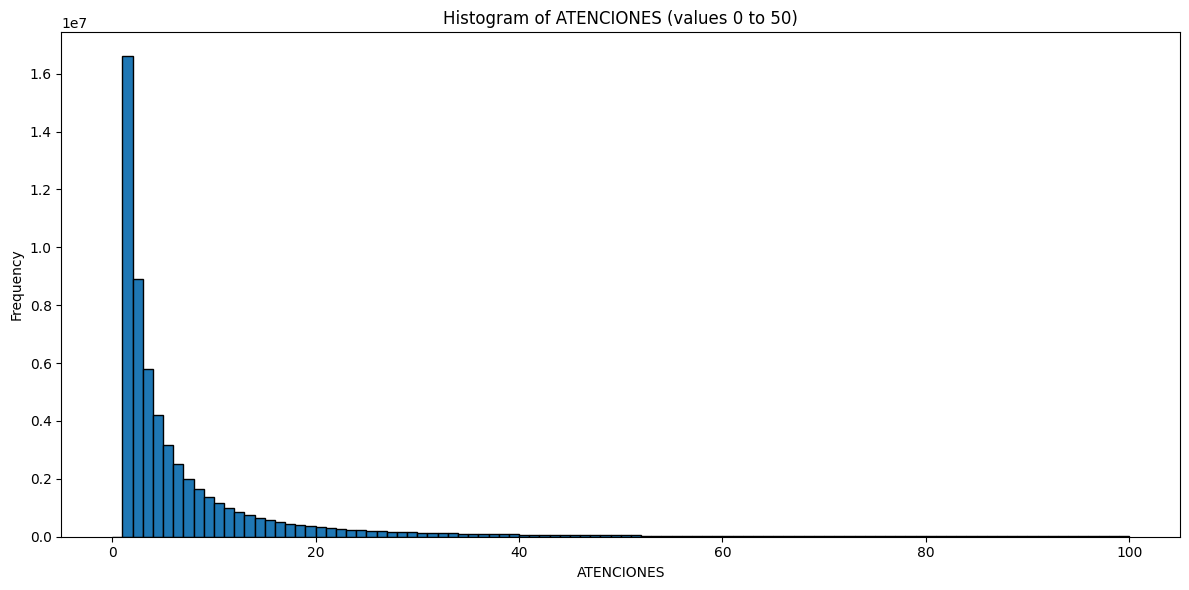

In [54]:
plt.figure(figsize=(12, 6))
plt.hist(df_all['ATENCIONES'].dropna(), bins=100, range=(0, 100), edgecolor='black')
plt.title('Histogram of ATENCIONES (values 0 to 50)')
plt.xlabel('ATENCIONES')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


In [45]:
# Calcular cantidad y porcentaje de nulos
null_counts = df_all.isnull().sum()
null_counts = null_counts[null_counts > 0]

# Calcular porcentaje
null_percent = (null_counts / len(df_all)) * 100

# Crear tabla
null_summary = pd.DataFrame({
    'Null Count': null_counts,
    'Null Percentage': null_percent.round(2)
})

null_summary


,Null Count,Null Percentage
PROVINCIA,27216,0.05
DISTRITO,27216,0.05
COD_UNIDAD_EJECUTORA,1239,0.00
DESC_UNIDAD_EJECUTORA,1239,0.00
PLAN_SEGURO,36,0.00
